In [1]:
##
##
##
## PowerSystem_Dataset
##
##o

In [2]:
##
##
##
## preprocessing du dataset
##
##
## 

In [3]:

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from scipy.stats import entropy
from statsmodels.tsa import stattools
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import *

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [4]:
data_1 = pd.read_csv("data1.csv")

In [5]:
##
##
##
## description du dataset 
##
##
## 

In [6]:
data_1.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,...,4966.0,4966.0,4966.000000,4966.000000,4966.000000,4966.000000,4966.0,4966.0,4966.0,4966.0
mean,-17.925492,130994.354960,8.610555,131258.159486,1.681621,131575.619600,-17.467920,397.526132,10.507730,390.915035,...,0.0,0.0,0.037857,0.022755,0.018526,0.029803,0.0,0.0,0.0,0.0
std,98.099812,6545.849798,115.044643,2692.553537,96.408966,2772.274253,97.437891,181.156073,111.699778,143.141274,...,0.0,0.0,0.190871,0.149136,0.134857,0.170060,0.0,0.0,0.0,0.0
min,-179.988962,24998.050190,-179.994691,102449.381200,-179.960314,98161.852050,-179.988962,0.000000,-179.736860,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,-97.404258,131007.835800,-99.085889,130706.956500,-77.405166,131064.250625,-97.626279,317.146520,-90.269501,325.844245,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,-35.864293,131634.667500,17.077007,131333.788300,14.080438,131684.814000,-33.369062,389.658080,6.720795,391.855400,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,71.277382,132136.132900,116.783123,131835.253700,77.995312,132211.352700,67.545994,464.321182,115.522615,469.127820,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,179.994691,146302.530500,179.971773,146327.603700,179.966044,146452.970100,179.925936,1771.039920,179.988962,1263.642110,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


In [7]:
data_1.columns.values

array(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I',
       'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PA8:VH',
       'R1-PM8:V', 'R1-PA9:VH', 'R1-PM9:V', 'R1-PA10:IH', 'R1-PM10:I',
       'R1-PA11:IH', 'R1-PM11:I', 'R1-PA12:IH', 'R1-PM12:I', 'R1:F',
       'R1:DF', 'R1-PA:Z', 'R1-PA:ZH', 'R1:S', 'R2-PA1:VH', 'R2-PM1:V',
       'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH',
       'R2-PM4:I', 'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I',
       'R2-PA7:VH', 'R2-PM7:V', 'R2-PA8:VH', 'R2-PM8:V', 'R2-PA9:VH',
       'R2-PM9:V', 'R2-PA10:IH', 'R2-PM10:I', 'R2-PA11:IH', 'R2-PM11:I',
       'R2-PA12:IH', 'R2-PM12:I', 'R2:F', 'R2:DF', 'R2-PA:Z', 'R2-PA:ZH',
       'R2:S', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PA2:VH', 'R3-PM2:V',
       'R3-PA3:VH', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM4:I', 'R3-PA5:IH',
       'R3-PM5:I', 'R3-PA6:IH', 'R3-PM6:I', 'R3-PA7:VH', 'R3-PM7:V',
       'R3-PA8:VH',

In [8]:
print(pd.Series(data_1['marker']).value_counts())

Attack      3866
Natural      927
NoEvents     173
Name: marker, dtype: int64


In [9]:
data_1 = data_1.replace({'Attack': 2, 'Natural': 0,'NoEvents':1})

In [10]:
data_1.isnull().values.any() #nan values?

False

In [11]:
data_1.isnull().any().any()

False

In [12]:
is_infini = np.isinf(data_1)

row_has_infini = is_infini.any(axis=1)

rows_with_infini = data_1[row_has_infini]

In [13]:
rows_with_infini.iloc[150].values
#il y a des valeurs infinies

array([-1.24091199e+02,  5.85711587e+04,  1.31390682e+02,  1.22608290e+05,
       -6.80100903e+00,  1.26469574e+05,  1.78092472e+02,  1.68149913e+03,
       -1.43972835e+02,  5.34681200e+01,  8.35028691e+01,  5.82289800e+01,
       -1.19043441e+02,  1.01396304e+05,  6.77866367e+01,  3.30967164e+04,
        6.77178818e+01,  1.02549674e+04, -1.79994691e+02,  5.28272350e+02,
        1.77175739e+02,  5.80458700e+02,  1.77250224e+02,  5.72951190e+02,
        6.00560000e+01, -2.00000000e-01,  5.15957647e-01,  1.17204394e+00,
        2.05800000e+03, -1.49735423e+02,  1.26584250e+05,  9.03213492e+01,
        1.26429305e+05, -2.97207656e+01,  1.26661039e+05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.49713444e+02,  1.26556773e+05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [14]:
rows_with_infini[rows_with_infini['marker']==1].count()

R1-PA1:VH     0
R1-PM1:V      0
R1-PA2:VH     0
R1-PM2:V      0
R1-PA3:VH     0
             ..
snort_log1    0
snort_log2    0
snort_log3    0
snort_log4    0
marker        0
Length: 129, dtype: int64

In [15]:
#on remplace les valeurs infinies par 2 fois la valeur max du dataset
for column in data_1:
    is_infini = np.isinf(data_1[column]).any()
    if is_infini == True:
        data_1[column] = data_1[column].replace({np.inf: data_1[column][data_1[column]!=np.inf].max() *2, -np.inf: data_1[column][data_1[column]!= -np.inf].max() *2})
        

In [16]:
is_infini = np.isinf(data_1)

row_has_infini = is_infini.any(axis=1)

rows_with_infini = data_1[row_has_infini]
rows_with_infini.count()

R1-PA1:VH     0
R1-PM1:V      0
R1-PA2:VH     0
R1-PM2:V      0
R1-PA3:VH     0
             ..
snort_log1    0
snort_log2    0
snort_log3    0
snort_log4    0
marker        0
Length: 129, dtype: int64

In [17]:
list_ndiscrt = list(data_1.columns.values)
list_ndiscrt.remove('marker')



In [18]:
############### preprocessing from sklearn.preprocessing import MinMaxScaler

In [19]:
from sklearn.preprocessing import QuantileTransformer

In [20]:
scaler = QuantileTransformer()
data_1_x = data_1.drop(['marker'],axis=1)

In [21]:
data_1[list_ndiscrt] = scaler.fit_transform(data_1_x)

In [22]:
data_1

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,0.744355,0.034050,0.337045,0.034949,0.022858,0.033030,0.740682,0.963208,0.296245,0.974449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.762966,0.081081,0.356143,0.107107,0.042010,0.080080,0.768916,0.833333,0.324346,0.876877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.763265,0.082583,0.356473,0.110110,0.042252,0.082082,0.768769,0.833333,0.324520,0.876877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.765765,0.107608,0.358904,0.169670,0.045058,0.108108,0.771772,0.830831,0.326956,0.870404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.768837,0.291792,0.361680,0.399900,0.047425,0.296797,0.771226,0.835836,0.328771,0.865526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,0.673105,0.203704,0.266265,0.309810,0.952210,0.208709,0.671684,0.734245,0.234295,0.744745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4962,0.672988,0.233734,0.266098,0.334835,0.952053,0.235235,0.671338,0.738238,0.233613,0.746146,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4963,0.672017,0.275776,0.265258,0.399900,0.951036,0.285285,0.669868,0.750250,0.231396,0.749343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4964,0.671834,0.291792,0.265021,0.399900,0.950802,0.285285,0.669747,0.749249,0.231224,0.749750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
#on prépare un dataset PCA

In [25]:
######################### pca

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components = 25)

In [28]:
Y = data_1.drop(list_ndiscrt,axis=1)

In [29]:
principalComponents = pca.fit_transform(data_1.drop(['marker'],axis=1))

In [30]:
data_1_pca = pd.DataFrame(data = principalComponents)

In [31]:
data_1_pca = pd.concat([data_1_pca,Y],axis=1)
data_1_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,marker
0,-2.300509,-0.732081,2.507902,-0.860229,0.049388,0.564469,0.882750,0.815149,-0.394177,-0.394585,...,0.061266,-0.462475,-0.168682,-0.237515,0.152016,-0.004841,-0.038130,-0.027104,0.022087,1
1,-1.841529,-0.900955,2.178024,-0.769585,0.067190,-0.414094,0.741248,-0.287009,1.090509,-0.303645,...,0.124460,-0.371859,-0.074799,-0.096856,-0.027657,-0.059188,0.174357,0.057744,-0.002631,1
2,-1.839435,-0.903486,2.173653,-0.769039,0.067352,-0.412105,0.739941,-0.286451,1.089297,-0.303347,...,0.130303,-0.372742,-0.072220,-0.100476,-0.023228,-0.056027,0.172464,0.057933,0.000043,1
3,-1.747516,-0.932924,2.111321,-0.765432,0.069188,-0.304933,0.726760,-0.292868,1.101108,-0.293432,...,0.151310,-0.386179,-0.057453,-0.101751,-0.020221,-0.062550,0.189547,0.068027,-0.006483,1
4,-1.437281,-1.026215,1.874708,-0.763160,0.081746,0.094863,0.689835,-0.263296,1.025983,-0.255868,...,0.260819,-0.299764,-0.026971,-0.136161,0.033250,-0.079401,0.215859,0.104790,-0.041639,1


In [32]:
########################## test classifiers sur données brutes

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn import ensemble

In [34]:
data_1_train = data_1.sample(frac=0.7)
data_1_test = data_1.drop(data_1_train.index)

data_1_train_x = data_1_train.drop(['marker'],axis=1)
data_1_train_y = data_1_train['marker']

data_1_test_x = data_1_test.drop(['marker'],axis=1)
data_1_test_y = data_1_test['marker']

In [35]:
## decision tree

In [36]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [37]:
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9261744966442953

In [38]:
confusion_matrix(data_1_test_y, y_dct)

array([[ 244,    1,   48],
       [   0,   45,    4],
       [  54,    3, 1091]])

In [39]:
## random forest

In [40]:
model = ensemble.RandomForestClassifier()

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9604026845637584

In [41]:
confusion_matrix(data_1_test_y, y_dct)

array([[ 252,    0,   41],
       [   0,   47,    2],
       [  16,    0, 1132]])

Text(0.5, 1.0, 'importance de la feature')

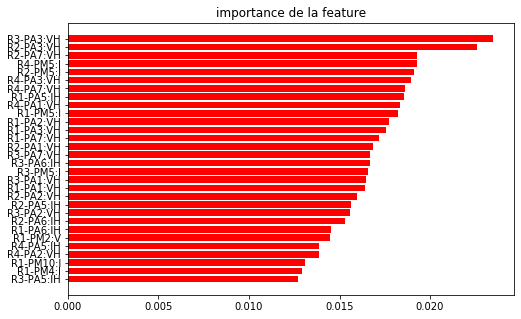

In [42]:
importances = model.feature_importances_
indices = np.argsort(importances)[-30:]

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)),importances[indices],color='r',align='center')
plt.yticks(range(len(indices)),data_1.columns[indices])
plt.title("importance de la feature")

In [43]:
########## autres

In [44]:
model = KNeighborsClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8550335570469799

In [45]:
model = GradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8939597315436242

In [46]:
model = GaussianNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.2865771812080537

In [47]:
model = SVC()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.785234899328859

In [48]:


from sklearn import tree

model = tree.ExtraTreeClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9308724832214765

In [49]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.963758389261745

In [50]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9671140939597316

In [51]:


from sklearn.neighbors import NearestCentroid

model = NearestCentroid()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.5523489932885906

In [52]:


from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.47651006711409394

In [53]:

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,100,30), max_iter=1000,
                     solver='sgd')

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,   y_dct)

0.8590604026845637

In [54]:
from sklearn.ensemble import AdaBoostClassifier


model = AdaBoostClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.6677852348993288

In [55]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9583892617449664

In [56]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
model = BaggingClassifier(base_estimator=tree.ExtraTreeClassifier(), n_estimators=10, random_state=0)
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)


0.9429530201342282

In [57]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
model = BaggingClassifier(base_estimator=HistGradientBoostingClassifier(), n_estimators=10, random_state=0)
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)


0.9557046979865772

In [58]:
from sklearn.ensemble import VotingClassifier

classifiers = [
    ('etc', tree.ExtraTreeClassifier()),
    ('hgbc', HistGradientBoostingClassifier())
    
]
model = VotingClassifier(classifiers)

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9442953020134228

In [59]:
#######  classifiers with pca

In [60]:
data_1_train = data_1_pca.sample(frac=0.7)
data_1_test = data_1_pca.drop(data_1_train.index)

data_1_train_x = data_1_train.drop(['marker'],axis=1)
data_1_train_y = data_1_train['marker']

data_1_test_x = data_1_test.drop(['marker'],axis=1)
data_1_test_y = data_1_test['marker']

In [61]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [62]:
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8583892617449664

In [63]:
confusion_matrix(data_1_test_y, y_dct)

array([[ 206,    1,   88],
       [   2,   36,   10],
       [ 100,   10, 1037]])

In [64]:
model = ensemble.RandomForestClassifier()

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
print(accuracy_score(data_1_test_y,y_dct))

print(confusion_matrix(data_1_test_y, y_dct))

0.8879194630872483
[[ 162    0  133]
 [   0   37   11]
 [  21    2 1124]]


In [65]:
model = KNeighborsClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8624161073825504

In [66]:
model = GradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8442953020134228

In [67]:
model = SVC()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.785234899328859

In [68]:


from sklearn import tree

model = tree.ExtraTreeClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8181208053691276

In [69]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9026845637583892

In [70]:
model = GaussianNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.6818791946308724

In [71]:


from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7442953020134229

In [72]:


from sklearn.neighbors import NearestCentroid

model = NearestCentroid()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.5114093959731544

In [73]:

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(30,30,10), max_iter=1000,
                     solver='sgd')

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,   y_dct)

/usr/local/lib64/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8268456375838926

In [74]:
from sklearn.ensemble import AdaBoostClassifier


model = AdaBoostClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.5503355704697986

In [75]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9060402684563759

In [76]:
from sklearn.ensemble import VotingClassifier

classifiers = [
    ('etc', tree.ExtraTreeClassifier()),
    ('hgbc', HistGradientBoostingClassifier()),
    ('knc', KNeighborsClassifier()),
]
model = VotingClassifier(classifiers)

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8885906040268456

In [ ]:
#les scores sont corrects mais peuvent etre mieux